## Note 

In [1]:
#Explore dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

training = pd.read_csv('training.csv')
testing = pd.read_csv('testing.csv', sep=';')

In [51]:
X = training[['PAY_1', 'PAY_2', 'PAY_3', 'EDUCATION']]
X.head()

,PAY_1,PAY_2,PAY_3,EDUCATION
0,0,0,0,1
1,1,2,0,1
2,0,0,0,1
3,0,0,0,1
4,0,0,0,1


## Get Dummies

In [52]:
X=pd.get_dummies(X.astype(str))
X.head()

,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4
0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0
2,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0
4,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0


In [53]:
y = training['TARGET']

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1763,  224],
       [ 699,  639]], dtype=int64)

In [54]:
from sklearn.metrics import classification_report

target =["terlambat", "tidak terlambat"]
print(classification_report(y_test, y_pred, target_names=target))

                 precision    recall  f1-score   support

      terlambat       0.72      0.89      0.79      1987
tidak terlambat       0.74      0.48      0.58      1338

    avg / total       0.73      0.72      0.71      3325



Ternyata hasilnya tidak jauh berbeda dengan hasil tanpa menggunakan dummies

## Distribution of PAY_AMT(i)

Text(0.5,0,'PAY_AMT3')

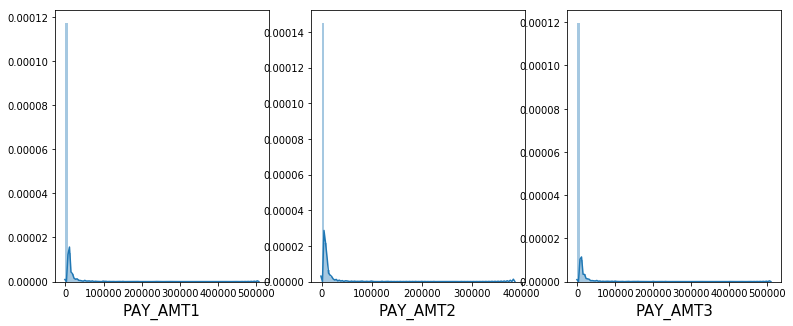

In [57]:
f=plt.figure(figsize=(13,5))

# Distribution of PAY_AMT1
f.add_subplot(1,3,1)
a=sns.distplot(training.PAY_AMT1, bins=70)
a.set_xlabel("PAY_AMT1", fontsize=15)

# Distribution of PAY_AMT2
f.add_subplot(1,3,2)

a=sns.distplot(training.PAY_AMT2, bins=70)
a.set_xlabel("PAY_AMT2", fontsize=15)

# Distribution of PAY_AMT3
f.add_subplot(1,3,3)
a=sns.distplot(training.PAY_AMT3, bins=70)
a.set_xlabel("PAY_AMT3", fontsize=15)

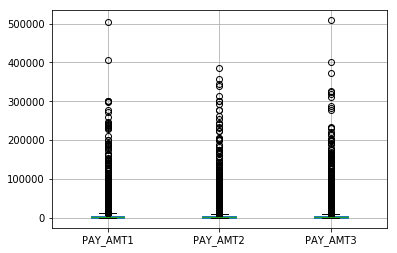

In [59]:
np.random.seed(1234)

boxplot = training.boxplot(column=['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3'])

## Feature Engineering

In [75]:
#importing libraries
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso

#Loading the dataset
training = pd.read_csv('training.csv')
X = training.drop(["TARGET", "ID"],1)   #Feature Matrix
y = training["TARGET"]          #Target Variable
X.head()

#Loading the dataset
#x = pd.read_csv('training.csv')
#df = pd.DataFrame(x.data, columns = x.feature_names)
#df["MEDV"] = x.target
#X = df.drop("MEDV",1)   #Feature Matrix
#y = df["MEDV"]          #Target Variable
#df.head()


,LIMIT_BAL,MARRIAGE,EDUCATION,SEX,AGE,PAY_1,PAY_2,PAY_3,BILL_AMT1,BILL_AMT2,BILL_AMT3,PAY_AMT1,PAY_AMT2,PAY_AMT3
0,30000.0,1,1,2,40,0,0,0,24607.0,24430.0,23881.0,1700.0,1600.0,1287.0
1,20000.0,1,1,2,41,1,2,0,17040.0,16474.0,17203.0,0.0,1300.0,1500.0
2,20000.0,1,1,2,36,0,0,0,17332.0,18600.0,17947.0,1580.0,1367.0,1178.0
3,20000.0,1,1,2,35,0,0,0,2003.0,2948.0,3372.0,1086.0,1000.0,0.0
4,170000.0,1,1,2,38,0,0,0,171465.0,145196.0,110163.0,18500.0,13998.0,3760.0


### Filter Method

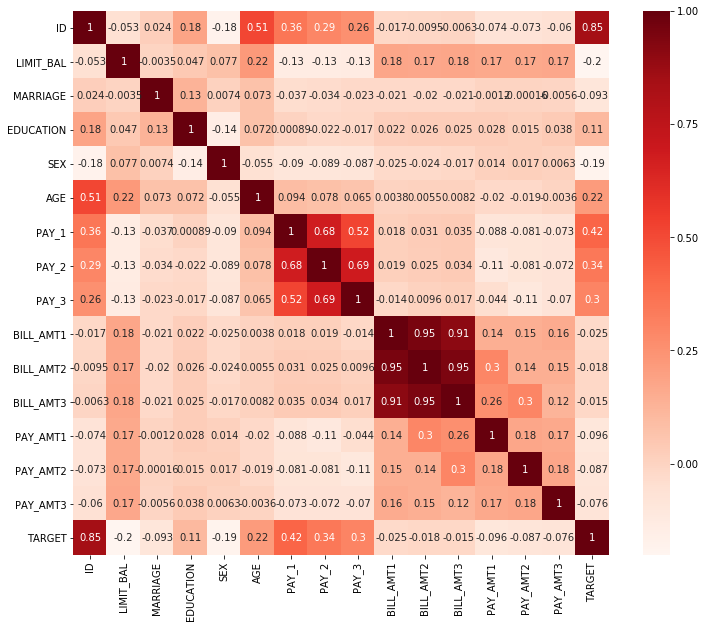

In [74]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = training.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [72]:
#Correlation with output variable
cor_target = abs(cor["TARGET"])

#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

ID        0.848229
TARGET    1.000000
Name: TARGET, dtype: float64

## Embedded Method

In [76]:
reg = LassoCV()
reg.fit(X, y)
print("Best alpha using built-in LassoCV: %f" % reg.alpha_)
print("Best score using built-in LassoCV: %f" %reg.score(X,y))
coef = pd.Series(reg.coef_, index = X.columns)

Best alpha using built-in LassoCV: 12.300865
Best score using built-in LassoCV: 0.052676


In [77]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 7 variables and eliminated the other 7 variables


Text(0.5,1,'Feature importance using Lasso Model')

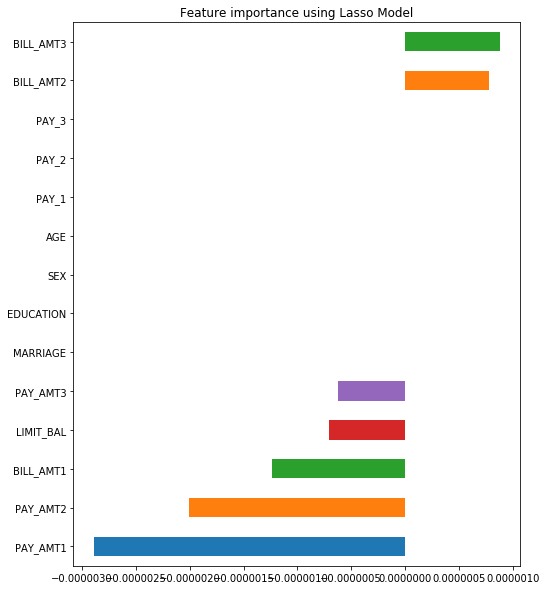

In [78]:
imp_coef = coef.sort_values()
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 10.0)
imp_coef.plot(kind = "barh")
plt.title("Feature importance using Lasso Model")